In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
#dataset.columns
dataset.head

<bound method NDFrame.head of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

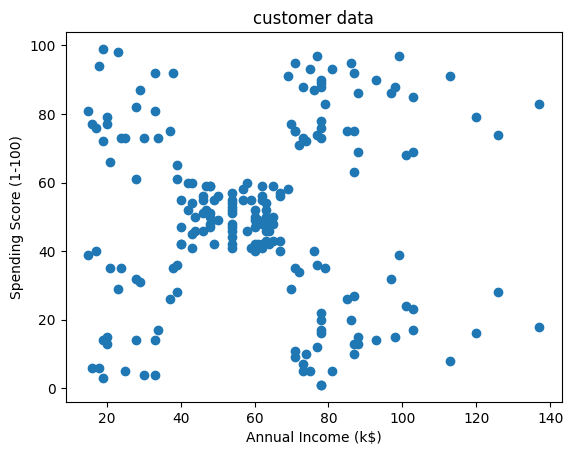

In [3]:
#plot the dataset
plot.scatter(dataset['Annual Income (k$)'],dataset['Spending Score (1-100)'])
plot.xlabel('Annual Income (k$)')
plot.ylabel('Spending Score (1-100)')
plot.title('customer data')
plot.show()

In [4]:
#subset od dataset
x=dataset.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [5]:
from sklearn.cluster import MeanShift
ms=MeanShift(bandwidth=25)
y_labels=ms.fit_predict(x)

In [6]:
#no of clusters
no_of_clusters=len(ms.cluster_centers_)
no_of_clusters

5

In [7]:
#silhouette score
from sklearn.metrics import silhouette_score
sh_score=silhouette_score(x, y_labels)
sh_score

np.float64(0.5513250428036421)

In [8]:
#Append the group of clusters as a colun in the main dataset
supervised=pd.DataFrame(dataset)
supervised["cluster_group"]=y_labels
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


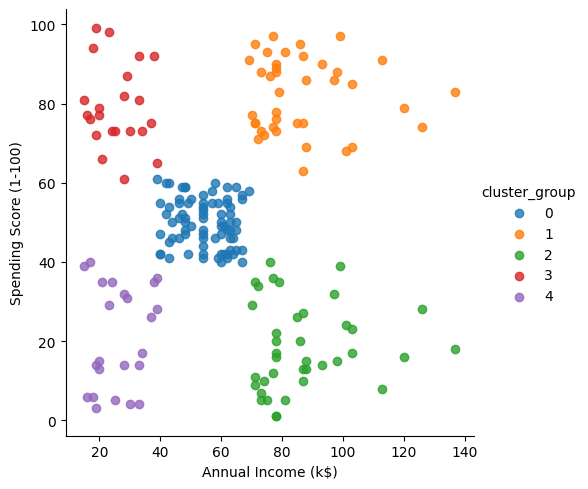

In [9]:
#plot the datas
sns.lmplot(supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],fit_reg=False)